In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data_income=pd.read_csv("I:/NPTEL/Python for Data Science/Week 4/income.csv")

In [4]:
df=data_income.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [6]:
df.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [7]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe(include="O")

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [9]:

df["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
df["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [11]:
print(np.unique(df["JobType"]))
print(np.unique(df["occupation"]))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [12]:
df=pd.read_csv("I:/NPTEL/Python for Data Science/Week 4/income.csv",na_values=[" ?"])

In [13]:
df.isna().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [14]:
missing=df[df.isnull().any(axis=1)]

In [15]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [16]:
df2=df.dropna(axis=0)

In [17]:
df2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [18]:
df2.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [19]:
df2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [20]:
### Gender proportion table
gender=pd.crosstab(index=df2["gender"],columns="count",normalize=True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [21]:
### Gender vs Salary Status

g_ss=pd.crosstab(index=df2["gender"],columns=df2["SalStat"],normalize="index",margins=True)

print(g_ss)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

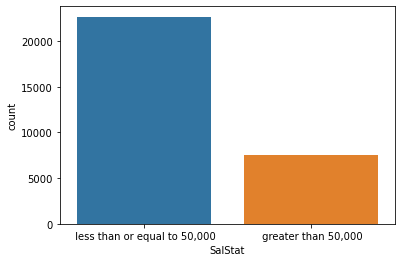

In [22]:
sns.countplot(df2["SalStat"])

I:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

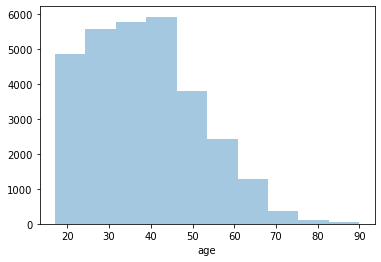

In [23]:
sns.distplot(df2["age"],bins=10,kde=False)

I:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

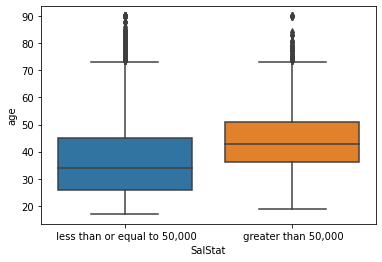

In [24]:
sns.boxplot("SalStat","age",data=df2)

## Logistic Regression

In [25]:
df2["SalStat"].unique()

array([' less than or equal to 50,000', ' greater than 50,000'],
      dtype=object)

In [26]:
df2["SalStat"]=df2["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})
print(df2["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-26-5444c710236c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SalStat"]=df2["SalStat"].map({" less than or equal to 50,000":0," greater than 50,000":1})


In [27]:
new_df=pd.get_dummies(df2,drop_first=True)

In [28]:
new_df

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
col_lst=list(new_df.columns)

In [30]:
indep=list(set(col_lst)-set(["SalStat"]))

In [31]:
len(indep)

94

In [32]:
y=new_df["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [33]:
x=new_df[indep].values
print(x)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [34]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.3,random_state=0)

In [35]:
logistic=LogisticRegression()

In [36]:
logistic.fit(train_x,train_y)

I:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
logistic.coef_

array([[-3.37479982e-02, -5.75562999e-01, -3.24910997e-01,
        -5.97337215e-02, -7.17829422e-02, -8.91961408e-04,
         3.55850380e-04,  1.13044569e+00, -3.86183917e-02,
         8.97873502e-01, -1.18452459e-02,  5.71745550e-03,
         5.26990432e-01, -1.88507352e-03, -1.34527354e+00,
        -3.90882908e-01, -2.03694111e-02, -2.64017578e-02,
        -2.17783207e-02, -3.27775704e-03, -4.86133102e-04,
        -8.21461037e-03, -4.14386269e-02, -7.40690507e-01,
        -9.36712591e-03, -7.42719353e-03, -5.83815625e-02,
        -4.97528723e-01, -4.49428164e-03, -3.95247665e-01,
        -1.27132997e-01, -8.25058310e-03, -3.39363089e-01,
        -1.42834835e-02, -4.33922063e-01, -2.24785253e-03,
        -9.58853001e-02, -2.57428871e-02, -8.35424602e-03,
         2.34143967e-01,  1.27032074e-02, -3.30270116e-03,
        -3.97201416e-02, -1.40542758e-01, -1.18271269e-01,
        -5.84517050e-01,  9.85979355e-02, -1.29033180e-02,
         9.10243464e-03, -1.94298673e-03,  7.22264883e-0

In [38]:
logistic.intercept_

array([-1.04087552])

In [39]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [40]:
conf_mat=confusion_matrix(test_y,prediction)
print(conf_mat)

[[6293  530]
 [ 947 1279]]


In [41]:
acc_score=accuracy_score(test_y,prediction)
print(acc_score)

0.836777544480053


In [42]:
(test_y!=prediction).sum()

1477

In [43]:
df2["SalStat"]

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [44]:
cols=["gender","nativecountry","race","JobType"]
new_df=df2.drop(cols,axis=1)

In [45]:
new_df.columns

Index(['age', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat'],
      dtype='object')

In [46]:
new_df=pd.get_dummies(new_df,drop_first=True)
new_df

,age,capitalgain,capitalloss,hoursperweek,SalStat,EdType_ 11th,EdType_ 12th,EdType_ 1st-4th,EdType_ 5th-6th,EdType_ 7th-8th,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,45,0,0,28,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,27,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,0,0,35,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,594,0,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31974,34,0,0,40,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
31975,23,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
col_lst=new_df.columns
indep=list(set(col_lst)-set(["SalStat"]))
indep

['relationship_ Unmarried',
 'EdType_ 1st-4th',
 'EdType_ Assoc-acdm',
 'EdType_ Prof-school',
 'age',
 'EdType_ 5th-6th',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ Assoc-voc',
 'occupation_ Exec-managerial',
 'occupation_ Sales',
 'EdType_ Masters',
 'hoursperweek',
 'EdType_ Bachelors',
 'maritalstatus_ Never-married',
 'occupation_ Armed-Forces',
 'occupation_ Farming-fishing',
 'EdType_ Preschool',
 'relationship_ Wife',
 'occupation_ Priv-house-serv',
 'capitalgain',
 'occupation_ Tech-support',
 'occupation_ Other-service',
 'EdType_ HS-grad',
 'EdType_ Doctorate',
 'occupation_ Craft-repair',
 'occupation_ Transport-moving',
 'maritalstatus_ Married-spouse-absent',
 'relationship_ Other-relative',
 'relationship_ Not-in-family',
 'EdType_ Some-college',
 'capitalloss',
 'occupation_ Prof-specialty',
 'EdType_ 11th',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'maritalstatus_ Widowed',
 'EdType_ 7th-8th',
 'occupation_ Protective-serv',
 'maritalsta

In [48]:
y=new_df["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [49]:
x=new_df[indep].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [50]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.3,random_state=0)

In [51]:
logistic.fit(train_x,train_y)

I:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
prediction=logistic.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
acc_score=accuracy_score(test_y,prediction)
acc_score

0.8337937893689911

In [54]:
(test_y!=prediction).sum()

1504

In [55]:
conf_mat=confusion_matrix(test_y,prediction)
conf_mat

array([[6298,  525],
       [ 979, 1247]], dtype=int64)

## K- Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KNN_classify=KNeighborsClassifier(n_neighbors=5)

In [58]:
KNN_classify.fit(train_x,train_y)

KNeighborsClassifier()

In [59]:
prediction=KNN_classify.predict(test_x)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
conf_mat=confusion_matrix(test_y,prediction)
conf_mat

array([[6183,  640],
       [ 861, 1365]], dtype=int64)

In [61]:
accuracy_score(test_y,prediction)

0.8341253177146646

In [62]:
misclassifiedsample=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i=knn.predict(test_x)
    misclassifiedsample.append((test_y!=pred_i).sum())
print(misclassifiedsample)

[1715, 1506, 1562, 1475, 1501, 1435, 1469, 1445, 1459, 1420, 1467, 1453, 1441, 1429, 1453, 1436, 1444, 1422, 1439]
